# An Implementation with Supply Chain Real Industry Dataset

## 1. Introduction to the Dataset

The dataset at hand is a comprehensive sales record dataset provided by a a renowned consumer goods company. In here, we can it "company A". This dataset aims to facilitate the prediction of item sales quantities in each unit (EA) using various informative features. The dataset encompasses a wide range of variables that provide insights into the sales dynamics and factors influencing consumer behavior.

### Objective:

The primary objective of this dataset is to develop a predictive model that accurately estimates the sales quantity of each item (Pos_Qty_EA) based on the provided features. By leveraging the historical sales data, "company A" aims to forecast item sales more effectively, optimize inventory management, and make data-driven decisions to maximize sales revenue and profitability.

Additionally, this dataset can be utilized to gain insights into the factors that drive or hinder sales, assess the impact of promotional activities, evaluate the performance of different store banners, and analyze the influence of pricing tiers on consumer behavior.

Through detailed exploration and analysis of this dataset, Nestle can enhance its understanding of market dynamics, improve sales forecasting accuracy, and make informed business decisions that align with customer demands and preferences.

## 2. Preparation

### 2.1 Import library

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

### 2.2 Load and explore the dataset

In [249]:
# get all the files from github
!git clone https://github.com/MLcmore2023/MLcmore2023.git

fatal: destination path 'MLcmore2023' already exists and is not an empty directory.


In [250]:
!mv ./MLcmore2023/'Section 7 Implementation with Industry Dataset'/* ./MLcmore2023/'Section 7 Implementation with Industry Dataset'/.* ./

zsh:1: no matches found: ./MLcmore2023/Section 7 Implementation with Industry Dataset/.*


In [251]:
df = pd.read_csv('campany_A_data.csv')

In [252]:
df.head(2)

,MATERIAL,source,Banner,SRC_BAN_POS,Plan_Banner,Plan_Region,CL4Key,CL6Key,pos_date,Pos_Qty_EA,...,PromoId,InStoreStart,InStoreEnd,PromoDuration,MATERIALDESC,SUB_CATEGORY,SUB_CATEGORY_DESC,CATEGORY,CATEGORY_DESC,FGroup_Desc
0,11001187,Company A,Company A ONTARIO,2022-06-10,Company A,ONTARIO,292278,292696,2022-06-10,69,...,1358399,2022-06-09,2022-07-13,35,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk
1,11001187,Company A,Company A ONTARIO,2022-06-09,Company A,ONTARIO,292278,292696,2022-06-09,60,...,1358399,2022-06-09,2022-07-13,35,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk


In [253]:
df.describe()

,MATERIAL,CL4Key,CL6Key,Pos_Qty_EA,Pos_Sales,POS_QTY_CS,UBP,FACTOR_EACH,PER_SALES_UOM_CASE,Total_Sales,Baseline_Qty,Baseline_Nps,Incr_Sales,PromoId,PromoDuration
count,5.533000e+03,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5.533000e+03,5533.000000
mean,1.161107e+07,292278.524489,292866.180192,127.783481,511.145648,12.123744,50.339917,1.417495,15.055847,535.643945,6.246702,251.731177,283.912767,1.156755e+06,110.433038
std,1.499871e+06,0.499445,177.274711,136.441474,441.683764,13.787538,26.295688,1.383300,19.247455,586.828597,5.385941,154.745590,538.807652,5.379376e+05,119.403083
min,6.200436e+06,292278.000000,292696.000000,-6.000000,-12.990000,-0.250000,10.750000,1.000000,4.000000,-10.750000,0.000000,0.000000,-557.600000,1.286940e+05,1.000000
25%,1.125040e+07,292278.000000,292696.000000,44.000000,219.600000,3.750000,35.160000,1.000000,6.000000,202.540000,2.000000,129.360000,4.940000,7.613300e+05,28.000000
50%,1.230503e+07,292279.000000,292698.000000,91.000000,426.240000,9.000000,42.420000,1.000000,12.000000,390.570000,5.000000,210.960000,129.360000,1.352987e+06,63.000000
75%,1.240749e+07,292279.000000,293051.000000,168.000000,665.260000,15.400000,63.600000,1.000000,15.000000,651.900000,8.000000,368.400000,375.200000,1.389990e+06,150.000000
max,1.248404e+07,292279.000000,293051.000000,2326.000000,4628.740000,279.250000,155.520000,6.000000,144.000000,6815.180000,35.000000,678.720000,6358.100000,2.651405e+06,365.000000


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5533 entries, 0 to 5532
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MATERIAL            5533 non-null   int64  
 1   source              5533 non-null   object 
 2   Banner              5533 non-null   object 
 3   SRC_BAN_POS         5533 non-null   object 
 4   Plan_Banner         5533 non-null   object 
 5   Plan_Region         5533 non-null   object 
 6   CL4Key              5533 non-null   int64  
 7   CL6Key              5533 non-null   int64  
 8   pos_date            5533 non-null   object 
 9   Pos_Qty_EA          5533 non-null   int64  
 10  Pos_Sales           5533 non-null   float64
 11  POS_QTY_CS          5533 non-null   float64
 12  UBP                 5533 non-null   float64
 13  UNIT                5533 non-null   object 
 14  FACTOR_EACH         5533 non-null   int64  
 15  PER_SALES_UOM_CASE  5533 non-null   int64  
 16  Comple

### Features Explanation:


1. MATERIAL: The unique identifier for each item in the dataset.
2. source: The source of the sales data (e.g., point of sale systems, online sales platform, etc.).
3. Banner: The name or identifier of the retail banner (store brand) where the item was sold.
4. SRC_BAN_POS: The source of the sales data specific to the retail banner.
5. Plan_Banner: The planned retail banner for the item.
6. Plan_Region: The planned region for the item's sales.
7. CL4Key: The identifier for a higher-level category or classification level 4 of the item.
8. CL6Key: The identifier for a lower-level category or classification level 6 of the item.
9. pos_date: The date of the sales record.
10. **Pos_Qty_EA: The sales quantity of the item in each unit (target variable).**
11. Pos_Sales: The sales amount or revenue generated from the item.
12. POS_QTY_CS: The sales quantity of the item in case units (CS stands for case).
13. UBP: The unit buying price, which represents the cost of purchasing the item.
14. UNIT: The unit of measure for the item's sales quantity (EA or CS).
15. FACTOR_EACH: The conversion factor between each unit (EA) and case unit (CS).
16. PER_SALES_UOM_CASE: The sales quantity per unit of measure (case) for the item.
17. Complete_PPG: The identifier for a complete product group, which represents a broader category or grouping of items.
18. Total_Sales: The total sales amount or revenue for all items.
19. Baseline_Qty: The baseline or expected sales quantity for the item.
20. Baseline_Nps: The baseline or expected net promoter score (NPS) associated with the item.
21. ForecastDate: The date of the sales forecast for the item.
22. Incr_Sales: The incremental or additional sales generated by a promotional activity or event.
23. PromoId: The identifier for a specific promotional activity or event.
24. InStoreStart: The start date of the promotional activity or event in the store.
25. InStoreEnd: The end date of the promotional activity or event in the store.
26. PromoDuration: The duration of the promotional activity or event.
27. MATERIALDESC: A description or name of the item.
28. SUB_CATEGORY: The identifier for a sub-category of the item.
29. SUB_CATEGORY_DESC: A description or name of the sub-category.
30. CATEGORY: The identifier for the category of the item.
31. CATEGORY_DESC: A description or name of the category.
32. FGroup_Desc: A description or name of the item's functional group.

## 3. Data Cleaning

### 3.1 Check for Missing Values

In [255]:
# Check for missing values
print(df.isnull().sum())

MATERIAL              0
source                0
Banner                0
SRC_BAN_POS           0
Plan_Banner           0
Plan_Region           0
CL4Key                0
CL6Key                0
pos_date              0
Pos_Qty_EA            0
Pos_Sales             0
POS_QTY_CS            0
UBP                   0
UNIT                  0
FACTOR_EACH           0
PER_SALES_UOM_CASE    0
Complete_PPG          0
Total_Sales           0
Baseline_Qty          0
Baseline_Nps          0
Incr_Sales            0
PromoId               0
InStoreStart          0
InStoreEnd            0
PromoDuration         0
MATERIALDESC          0
SUB_CATEGORY          0
SUB_CATEGORY_DESC     0
CATEGORY              0
CATEGORY_DESC         0
FGroup_Desc           0
dtype: int64


Since the datasets do not contain any missing values, we can proceed to the next step. Let us now examine each feature one by one.

### 3.2 Check for Duplicate Values

In [256]:
duplicate_rows = df[df.duplicated(keep=False)]
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found in the dataset.")

No duplicate rows found in the dataset.


## 4. Data Encoding

### 4.1 Find all the Categorical Data (excluding integer and float columns)

In [257]:
categorical_columns = df.select_dtypes(exclude=['int', 'float']).columns

print("Categorical columns:")
print(categorical_columns)
print("There are " + str(len(categorical_columns)) + " categorical features.")

Categorical columns:
Index(['source', 'Banner', 'SRC_BAN_POS', 'Plan_Banner', 'Plan_Region',
       'pos_date', 'UNIT', 'Complete_PPG', 'InStoreStart', 'InStoreEnd',
       'MATERIALDESC', 'SUB_CATEGORY', 'SUB_CATEGORY_DESC', 'CATEGORY',
       'CATEGORY_DESC', 'FGroup_Desc'],
      dtype='object')
There are 16 categorical features.


### 4.2 Check the Number of Unique Values in columns with Categorical Data

In [258]:
# create a dataframe with all the categorical data from the original dataset
df_categorical = df[categorical_columns]
df_categorical.head(2)

,source,Banner,SRC_BAN_POS,Plan_Banner,Plan_Region,pos_date,UNIT,Complete_PPG,InStoreStart,InStoreEnd,MATERIALDESC,SUB_CATEGORY,SUB_CATEGORY_DESC,CATEGORY,CATEGORY_DESC,FGroup_Desc
0,Company A,Company A ONTARIO,2022-06-10,Company A,ONTARIO,2022-06-10,EA,Superbundle,2022-06-09,2022-07-13,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk
1,Company A,Company A ONTARIO,2022-06-09,Company A,ONTARIO,2022-06-09,EA,Superbundle,2022-06-09,2022-07-13,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk


In [259]:
unique_value_counts = df_categorical.nunique()

print("Number of unique values in each column:")
print(unique_value_counts)

Number of unique values in each column:
source                 1
Banner                 3
SRC_BAN_POS          455
Plan_Banner            2
Plan_Region            2
pos_date             455
UNIT                   2
Complete_PPG          23
InStoreStart          89
InStoreEnd            81
MATERIALDESC          31
SUB_CATEGORY          21
SUB_CATEGORY_DESC     21
CATEGORY              11
CATEGORY_DESC         11
FGroup_Desc           27
dtype: int64


Based on the provided information, which includes the categorical dataset (`df_categorical`) and the number of unique values in each column, it is recommended to separate the following columns from the rest: "SRC_BAN_POS", "pos_date", "ForecastDate", "InStoreStart", and "InStoreEnd". These columns represent time.

### 4.3 Separation of Temporal Variables based on Unique Value Analysis

In [260]:
df_categorical.head(2)

,source,Banner,SRC_BAN_POS,Plan_Banner,Plan_Region,pos_date,UNIT,Complete_PPG,InStoreStart,InStoreEnd,MATERIALDESC,SUB_CATEGORY,SUB_CATEGORY_DESC,CATEGORY,CATEGORY_DESC,FGroup_Desc
0,Company A,Company A ONTARIO,2022-06-10,Company A,ONTARIO,2022-06-10,EA,Superbundle,2022-06-09,2022-07-13,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk
1,Company A,Company A ONTARIO,2022-06-09,Company A,ONTARIO,2022-06-09,EA,Superbundle,2022-06-09,2022-07-13,STOUFFER'S BST Italian 5 Cheese 8x256gCA,CAKK1K112,STF BISTRO CRUSTINI,CAKK1,FROZEN MEALS,CEF - CA Bistro 8pk


In [261]:
temporal_variables = ["SRC_BAN_POS", "pos_date", "InStoreStart", "InStoreEnd"]
temporal_variables

['SRC_BAN_POS', 'pos_date', 'InStoreStart', 'InStoreEnd']

In [262]:
other_categorical_variables = list(set(categorical_columns) - set(temporal_variables))
other_categorical_variables

['MATERIALDESC',
 'CATEGORY_DESC',
 'Plan_Banner',
 'Plan_Region',
 'UNIT',
 'Complete_PPG',
 'SUB_CATEGORY_DESC',
 'FGroup_Desc',
 'SUB_CATEGORY',
 'CATEGORY',
 'Banner',
 'source']

In [263]:
df_categorical[other_categorical_variables].head(2)

,MATERIALDESC,CATEGORY_DESC,Plan_Banner,Plan_Region,UNIT,Complete_PPG,SUB_CATEGORY_DESC,FGroup_Desc,SUB_CATEGORY,CATEGORY,Banner,source
0,STOUFFER'S BST Italian 5 Cheese 8x256gCA,FROZEN MEALS,Company A,ONTARIO,EA,Superbundle,STF BISTRO CRUSTINI,CEF - CA Bistro 8pk,CAKK1K112,CAKK1,Company A ONTARIO,Company A
1,STOUFFER'S BST Italian 5 Cheese 8x256gCA,FROZEN MEALS,Company A,ONTARIO,EA,Superbundle,STF BISTRO CRUSTINI,CEF - CA Bistro 8pk,CAKK1K112,CAKK1,Company A ONTARIO,Company A


### 4.4 Function that Performs Label Encoding on Categorical Variables

In [264]:
from sklearn.preprocessing import LabelEncoder

def label_encode_features(df, features):
    """
    Perform label encoding on specified features in a DataFrame.

    Args:
        df (pandas.DataFrame): Input DataFrame.
        features (list): List of feature names to encode.

    Returns:
        pandas.DataFrame: Encoded DataFrame.
    """
    encoded_df = df.copy()
    encoder = LabelEncoder()

    for feature in features:
        encoded_df[feature] = encoder.fit_transform(encoded_df[feature])

    return encoded_df

In [265]:
df = label_encode_features(df, other_categorical_variables)

In [266]:
df.head(2)

,MATERIAL,source,Banner,SRC_BAN_POS,Plan_Banner,Plan_Region,CL4Key,CL6Key,pos_date,Pos_Qty_EA,...,PromoId,InStoreStart,InStoreEnd,PromoDuration,MATERIALDESC,SUB_CATEGORY,SUB_CATEGORY_DESC,CATEGORY,CATEGORY_DESC,FGroup_Desc
0,11001187,0,0,2022-06-10,0,0,292278,292696,2022-06-10,69,...,1358399,2022-06-09,2022-07-13,35,28,13,16,6,3,18
1,11001187,0,0,2022-06-09,0,0,292278,292696,2022-06-09,60,...,1358399,2022-06-09,2022-07-13,35,28,13,16,6,3,18


Up to this point, we have successfully encoded all categorical features, except for the temporal features

### 4.5 Converting Temporal Data to Datetime Format

To leverage the benefits of specialized functions, efficient storage, compatibility with analysis techniques, and enhanced plotting and visualization, we should convert the temporal data from object data type to datetime format.

In [267]:
temporal_variables

['SRC_BAN_POS', 'pos_date', 'InStoreStart', 'InStoreEnd']

In [268]:
# Convert the date columns to datetime data type
df[temporal_variables] = df[temporal_variables].apply(pd.to_datetime)

In [269]:
df.head(2)

,MATERIAL,source,Banner,SRC_BAN_POS,Plan_Banner,Plan_Region,CL4Key,CL6Key,pos_date,Pos_Qty_EA,...,PromoId,InStoreStart,InStoreEnd,PromoDuration,MATERIALDESC,SUB_CATEGORY,SUB_CATEGORY_DESC,CATEGORY,CATEGORY_DESC,FGroup_Desc
0,11001187,0,0,2022-06-10,0,0,292278,292696,2022-06-10,69,...,1358399,2022-06-09,2022-07-13,35,28,13,16,6,3,18
1,11001187,0,0,2022-06-09,0,0,292278,292696,2022-06-09,60,...,1358399,2022-06-09,2022-07-13,35,28,13,16,6,3,18


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5533 entries, 0 to 5532
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   MATERIAL            5533 non-null   int64         
 1   source              5533 non-null   int64         
 2   Banner              5533 non-null   int64         
 3   SRC_BAN_POS         5533 non-null   datetime64[ns]
 4   Plan_Banner         5533 non-null   int64         
 5   Plan_Region         5533 non-null   int64         
 6   CL4Key              5533 non-null   int64         
 7   CL6Key              5533 non-null   int64         
 8   pos_date            5533 non-null   datetime64[ns]
 9   Pos_Qty_EA          5533 non-null   int64         
 10  Pos_Sales           5533 non-null   float64       
 11  POS_QTY_CS          5533 non-null   float64       
 12  UBP                 5533 non-null   float64       
 13  UNIT                5533 non-null   int64       

## 5. Data Visualization

### 5.1 Distribution of Pos_Qty_EA (target value)

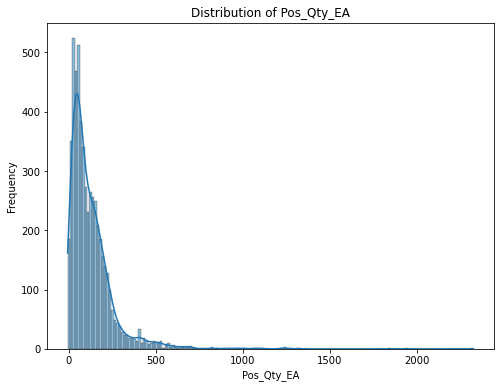

In [271]:
# Distribution plot of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Pos_Qty_EA', kde=True)
plt.xlabel('Pos_Qty_EA')
plt.ylabel('Frequency')
plt.title('Distribution of Pos_Qty_EA')
plt.show()

The distribution plot of the target variable Pos_Qty_EA showcases a majority of values concentrated between 0 and 500, with a notable peak in frequency within this range.

### 5.2 Relationship between Pos_Qty_EA and Total_Sales

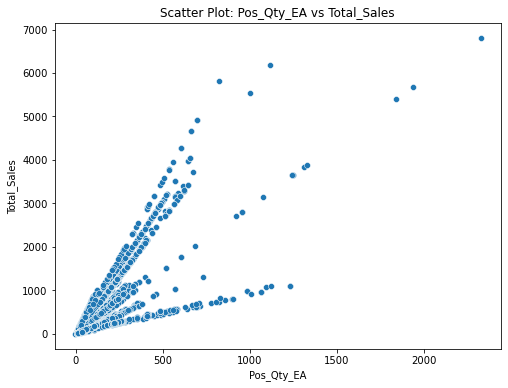

In [272]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Pos_Qty_EA', y='Total_Sales')
plt.xlabel('Pos_Qty_EA')
plt.ylabel('Total_Sales')
plt.title('Scatter Plot: Pos_Qty_EA vs Total_Sales')
plt.show()


The scatter plot demonstrates a positive correlation between Pos_Qty_EA and Total_Sales, highlighting a potential pattern indicating that higher values of Pos_Qty_EA tend to correspond with higher values of Total_Sales.

### 5.3 Average Pos_Qty_EA by Banner

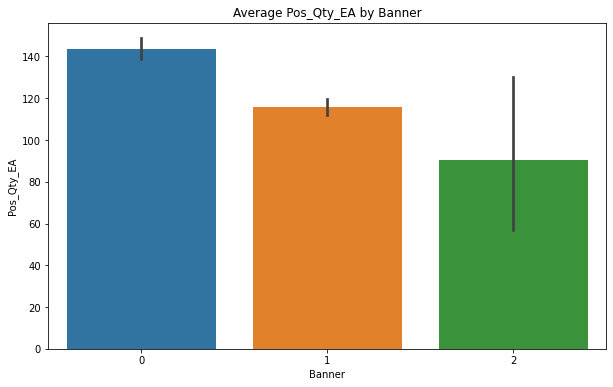

In [273]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Banner', y='Pos_Qty_EA')
plt.xlabel('Banner')
plt.ylabel('Pos_Qty_EA')
plt.title('Average Pos_Qty_EA by Banner')
plt.show()


The bar plot presents the average Pos_Qty_EA for each Banner category, revealing a descending order in quantity from the highest value in Banner 0 to the lowest value in Banner 2. This allows for a clear comparison of average quantities across different banners.

## 6. Feature Engineering

### 6.1 Feature Engineering with Temporal Variables - "pos_date" & "SRC_BAN_POS"

In [274]:
df[temporal_variables].head()

,SRC_BAN_POS,pos_date,InStoreStart,InStoreEnd
0,2022-06-10,2022-06-10,2022-06-09,2022-07-13
1,2022-06-09,2022-06-09,2022-06-09,2022-07-13
2,2022-06-12,2022-06-12,2022-06-09,2022-07-13
3,2022-06-11,2022-06-11,2022-06-09,2022-07-13
4,2022-06-16,2022-06-16,2022-06-09,2022-07-13


We suspect that the "SRC_BAN_POS" and "pos_date" columns might have identical values. Let's investigate further to confirm our observation.

In [275]:
# Compare the two columns
are_equal = df['SRC_BAN_POS'] == df['pos_date']

# Check if all values are equal
all_equal = are_equal.all()

# Check if any value is different
any_different = not all_equal

print("All values are equal:", all_equal)
print("Any value is different:", any_different)

All values are equal: True
Any value is different: False


Therefore, we can drop one of the columns.

In [276]:
# Let's drop 'SRC_BAN_POS' column
df = df.drop('SRC_BAN_POS', axis=1)

In [277]:
# remove the variable from the list
temporal_variables = [item for item in temporal_variables if item != "SRC_BAN_POS"]
temporal_variables

['pos_date', 'InStoreStart', 'InStoreEnd']

### 6.2 Feature Engineering with Temporal Variables - "InStoreStart" & "InStoreEnd"

In [281]:
df.columns

Index(['MATERIAL', 'source', 'Banner', 'Plan_Banner', 'Plan_Region', 'CL4Key',
       'CL6Key', 'pos_date', 'Pos_Qty_EA', 'Pos_Sales', 'POS_QTY_CS', 'UBP',
       'UNIT', 'FACTOR_EACH', 'PER_SALES_UOM_CASE', 'Complete_PPG',
       'Total_Sales', 'Baseline_Qty', 'Baseline_Nps', 'Incr_Sales', 'PromoId',
       'InStoreStart', 'InStoreEnd', 'PromoDuration', 'MATERIALDESC',
       'SUB_CATEGORY', 'SUB_CATEGORY_DESC', 'CATEGORY', 'CATEGORY_DESC',
       'FGroup_Desc'],
      dtype='object')

Upon observing the presence of the 'PromoDuration' feature, we will investigate its correlation with the 'InStoreStart' and 'InStoreEnd' columns.

In [293]:
for i in range(len(df)):
    
    # Assign values from DataFrame to variables for calculation
    date2 = df.InStoreStart[i]
    date1 = df.InStoreEnd[i]
    duration = df.PromoDuration[i]
    
    # Calculate the difference in terms of two dates
    date_difference = date1 - date2
    
    # Check if the duration matches the calculated date difference
    if (date_difference.days + 1) != duration:
        print("There is a discrepancy in the PromoDuration at index:", i)
    
print("All matches!")

All matches!


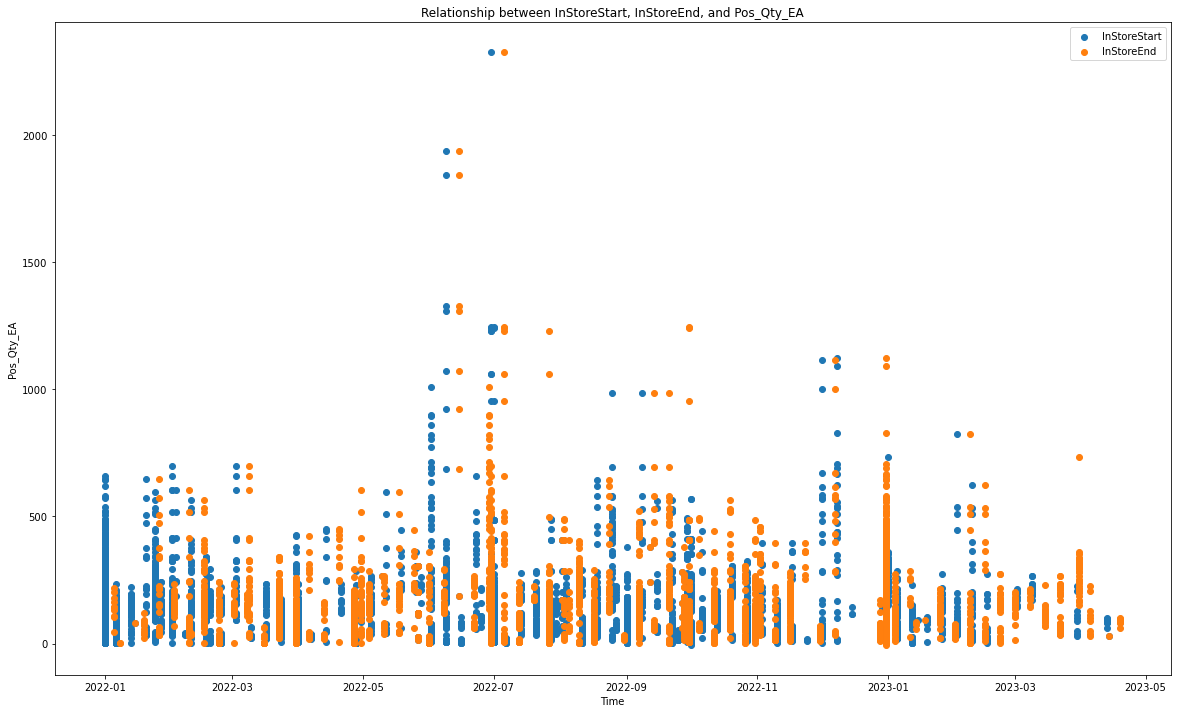

In [296]:
# Set the figure size
plt.figure(figsize=(20, 12))

plt.scatter(df['InStoreStart'], df['Pos_Qty_EA'], label='InStoreStart')
plt.scatter(df['InStoreEnd'], df['Pos_Qty_EA'], label='InStoreEnd')
plt.xlabel('Time')
plt.ylabel('Pos_Qty_EA')
plt.title('Relationship between InStoreStart, InStoreEnd, and Pos_Qty_EA')
plt.legend()
plt.show()

Therefore, based on the lack of correlation between "InStoreStart", "InStoreEnd", and the target variable "Pos_Qty_EA", it is recommended to drop these columns from further analysis as they may not provide valuable insights for predicting the target variable.

In [297]:
df = df.drop(['InStoreStart', 'InStoreEnd'], axis=1)

In [299]:
# remove the variable from the list
temporal_variables = [x for x in temporal_variables if x not in ['InStoreStart', 'InStoreEnd']]
temporal_variables

['pos_date']

### 6.3 Feature Engineering with Temporal Variables - "pos_date"

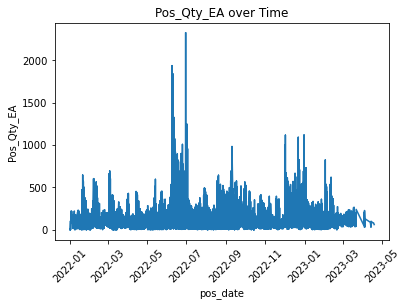

In [300]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'pos_date' and 'Pos_Qty_EA' columns

# Sort the DataFrame by 'pos_date' in ascending order
df_sorted = df.sort_values('pos_date')

# Plot the line graph
plt.plot(df_sorted['pos_date'], df_sorted['Pos_Qty_EA'])
plt.xlabel('pos_date')
plt.ylabel('Pos_Qty_EA')
plt.title('Pos_Qty_EA over Time')
plt.xticks(rotation=45)
plt.show()

In [304]:
# Extract days, months, and years from 'pos_date'
df['pos_days'] = df['pos_date'].dt.day
df['pos_month'] = df['pos_date'].dt.month
df['pos_year'] = df['pos_date'].dt.year

# Calculate the correlation coefficients
correlation = df[['pos_days', 'pos_month', 'pos_year', 'Pos_Qty_EA']].corr()['Pos_Qty_EA']

# Check the correlation values
print("Correlation with pos_days:", correlation['pos_days'])
print("Correlation with pos_month:", correlation['pos_month'])
print("Correlation with pos_year:", correlation['pos_year'])

Correlation with pos_days: -0.010636923980381668
Correlation with pos_month: 0.037597898412856844
Correlation with pos_year: -0.009780845376436855


Based on the analysis performed using different methods, it is evident that there is no significant correlation between the "pos_date" column and the target feature "Pos_Qty_EA". Therefore, it is recommended to drop the "pos_date" column from further analysis as it does not appear to provide valuable insights for predicting the target feature.

In [307]:
# Drop all of the unnecessary columns at once
df = df.drop(['pos_days', 'pos_month', 'pos_year', 'pos_date'], axis=1)

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5533 entries, 0 to 5532
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MATERIAL            5533 non-null   int64  
 1   source              5533 non-null   int64  
 2   Banner              5533 non-null   int64  
 3   Plan_Banner         5533 non-null   int64  
 4   Plan_Region         5533 non-null   int64  
 5   CL4Key              5533 non-null   int64  
 6   CL6Key              5533 non-null   int64  
 7   Pos_Qty_EA          5533 non-null   int64  
 8   Pos_Sales           5533 non-null   float64
 9   POS_QTY_CS          5533 non-null   float64
 10  UBP                 5533 non-null   float64
 11  UNIT                5533 non-null   int64  
 12  FACTOR_EACH         5533 non-null   int64  
 13  PER_SALES_UOM_CASE  5533 non-null   int64  
 14  Complete_PPG        5533 non-null   int64  
 15  Total_Sales         5533 non-null   float64
 16  Baseli

Now that all the remaining features are in numerical data type, we can proceed with further analysis.

### 6.4 Correlation Heapmap

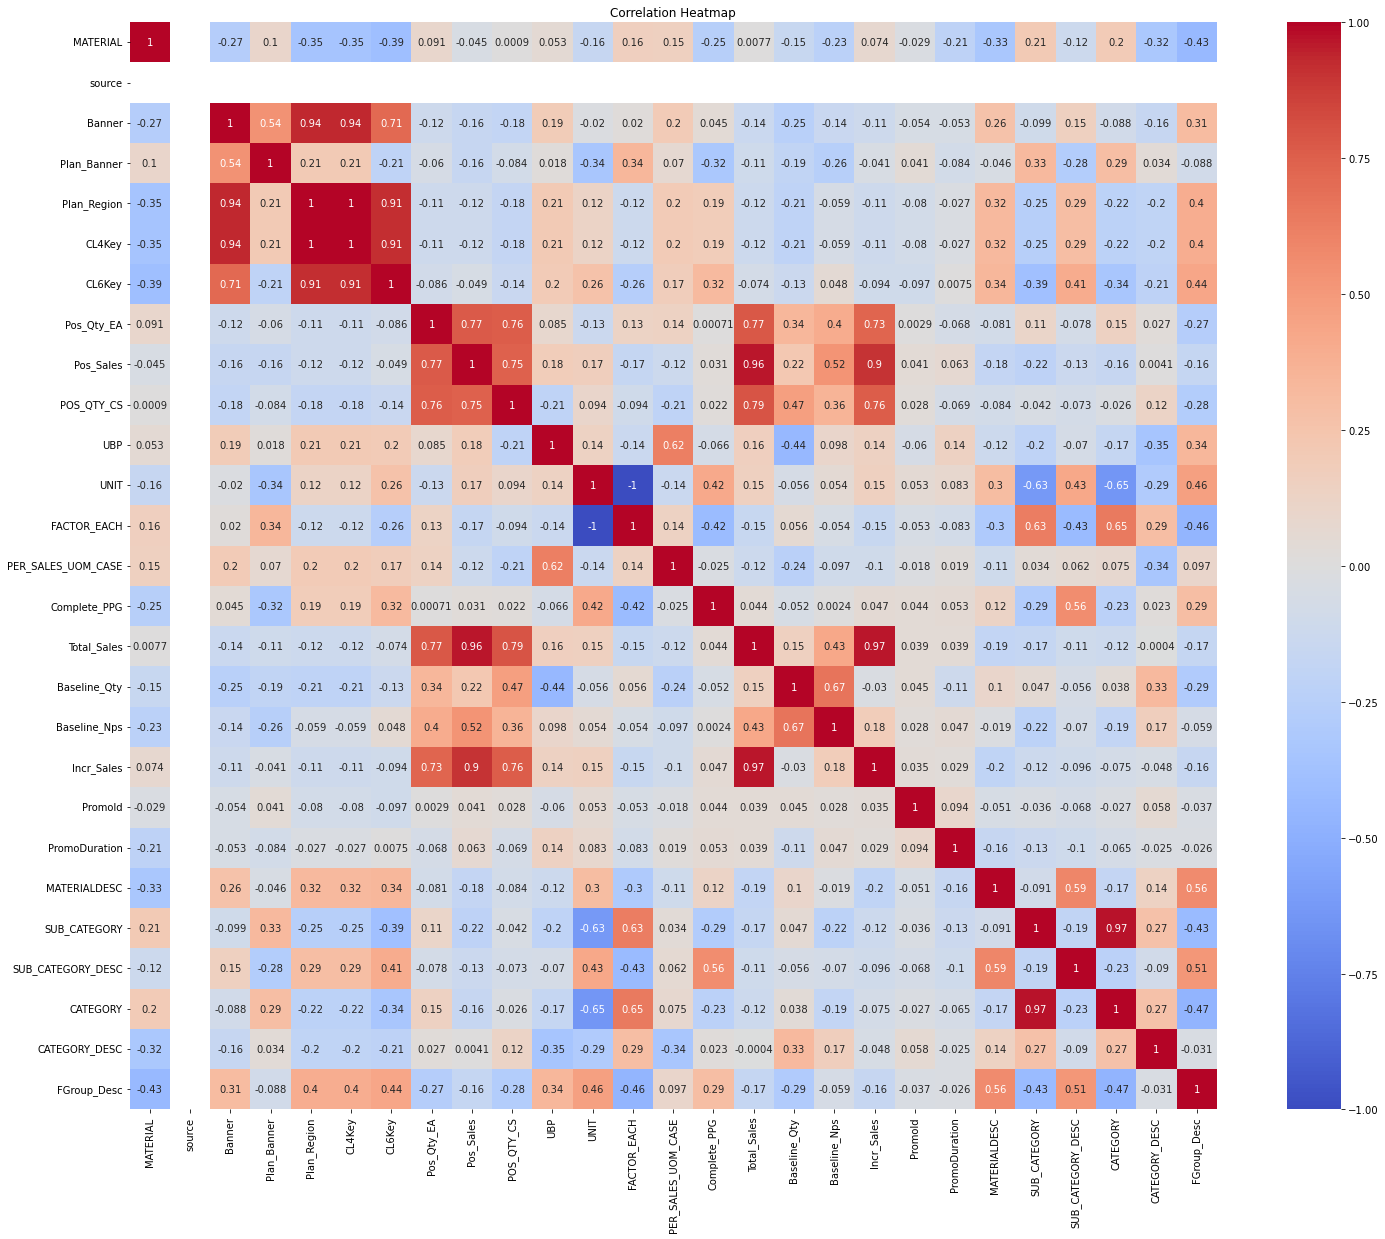

In [316]:
# Correlation heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


Representing the correlation between numerical features in this dataset, the color-coded heatmap provides insights into the relationships and dependencies among different features, including the target variable 'Pos_Qty_EA'. It highlights the strength and direction of these correlations.

### 6.5 Calculation and Ranking of Feature Correlation with the Target Variable

In [317]:
# Calculate the correlation between each feature and the target variable
correlation = df.corr()['Pos_Qty_EA'].drop('Pos_Qty_EA')

# Sort the correlation values in descending order
correlation = correlation.abs().sort_values(ascending=False)

# Print the feature correlation values
print(correlation)

Total_Sales           0.774830
Pos_Sales             0.766244
POS_QTY_CS            0.761907
Incr_Sales            0.728521
Baseline_Nps          0.401689
Baseline_Qty          0.340586
FGroup_Desc           0.268994
CATEGORY              0.148312
PER_SALES_UOM_CASE    0.138017
UNIT                  0.132075
FACTOR_EACH           0.132075
Banner                0.116845
CL4Key                0.110769
Plan_Region           0.110769
SUB_CATEGORY          0.105566
MATERIAL              0.090578
CL6Key                0.086100
UBP                   0.085023
MATERIALDESC          0.080645
SUB_CATEGORY_DESC     0.077511
PromoDuration         0.067790
Plan_Banner           0.059569
CATEGORY_DESC         0.026845
PromoId               0.002942
Complete_PPG          0.000708
source                     NaN
Name: Pos_Qty_EA, dtype: float64


### 6.6 Identification of Highly Correlated Features with the Target Variable based on a Threshold

In [318]:
# Set the correlation threshold
threshold = 0.5

# Filter features based on the correlation threshold
highly_correlated_features = correlation[correlation.abs() >= threshold]

# Print the highly correlated features
print(highly_correlated_features)

Total_Sales    0.774830
Pos_Sales      0.766244
POS_QTY_CS     0.761907
Incr_Sales     0.728521
Name: Pos_Qty_EA, dtype: float64


In [319]:
# These are the selected features 
threshold_selected_features = highly_correlated_features.index.tolist()
threshold_selected_features

['Total_Sales', 'Pos_Sales', 'POS_QTY_CS', 'Incr_Sales']

### 6.7 Feature selection using Tree-based feature importance

In [324]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Split the dataset into X (features) and y (target variable)
X = df.drop(columns=["Pos_Qty_EA"])
y = df["Pos_Qty_EA"]

# Random Forest parameters
n_estimators = 100  # Number of decision trees in the random forest
max_features = "sqrt"  # Maximum number of features considered for splitting

# Initialize an empty array for feature importances
feature_importances = np.zeros(X.shape[1])

# Build a random forest
for _ in range(n_estimators):
    # Randomly select a subset of the data with replacement
    random_indices = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
    X_subset = X.iloc[random_indices]
    y_subset = y.iloc[random_indices]
    
    # Train a decision tree on the subset
    tree = DecisionTreeRegressor(max_features=max_features)
    tree.fit(X_subset, y_subset)
    
    # Accumulate feature importances from each tree
    feature_importances += tree.feature_importances_

# Average feature importances over all trees
feature_importances /= n_estimators

# Sort feature importances in descending order
feature_indices = np.argsort(feature_importances)[::-1]

# Select top-k features
top_k = 5
selected_feature_indices = feature_indices[:top_k]
tree_selected_features = X.columns[selected_feature_indices]

In [325]:
tree_selected_features = list(tree_selected_features)
tree_selected_features

['POS_QTY_CS', 'Total_Sales', 'Pos_Sales', 'Incr_Sales', 'FGroup_Desc']

## 7. Model Selection

In this section, we will train multiple models using the dataset and evaluate their performance to select the model that achieves the highest level of accuracy. By comparing the accuracy of different models, we can determine which one is the most effective for this particular task. This process will enable us to make an informed decision about the best model to use for prediction or further analysis.






### 7.1 Import Libraries

In [326]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, accuracy_score

### 7.2 Model Comparison

In [328]:
# Separate features and target
X = df.drop('Pos_Qty_EA', axis=1)  # Features
y = df['Pos_Qty_EA']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define a dictionary to store model names and instances
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR(),
    'Neural Network': MLPRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Naive Bayes': GaussianNB()
}

# Create an empty dataframe to store accuracy scores
accuracy_df = pd.DataFrame(columns=['Model', 'Accuracy'])

# Iterate over the models, train, and evaluate
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred.round())  # Rounding the predictions for classification
    accuracy_df = accuracy_df.append({'Model': model_name, 'Accuracy': accuracy}, ignore_index=True)

In [329]:
# rank the model based on the accuracy
accuracy_df = accuracy_df.sort_values('Accuracy', ascending=False)
accuracy_df

,Model,Accuracy
1,Decision Tree,0.767841
2,Random Forest,0.69196
6,K-Nearest Neighbors,0.138211
3,Gradient Boosting,0.074977
7,Naive Bayes,0.0271
0,Linear Regression,0.01084
4,Support Vector Machine,0.009033
5,Neural Network,0.0


Therefore, the decision forest model has been chosen as the preferred model based on its performance and accuracy during the evaluation process.

## 8. Feature Selection: Identify the Optimal Feature Set

### 8.1 Dataframe Preparation

In [346]:
threshold_df = df[threshold_selected_features]
threshold_df["Pos_Qty_EA"] = df.Pos_Qty_EA
threshold_df.head()

,Total_Sales,Pos_Sales,POS_QTY_CS,Incr_Sales,Pos_Qty_EA
0,202.17,186.15,8.625,-125.99,69
1,175.80,161.86,7.500,-152.36,60
2,295.93,271.56,12.625,-32.23,101
3,205.10,188.51,8.750,-123.06,70
4,234.40,215.82,10.000,-93.76,80


In [348]:
tree_df = df[tree_selected_features]
tree_df["Pos_Qty_EA"] = df.Pos_Qty_EA
tree_df.head()

,POS_QTY_CS,Total_Sales,Pos_Sales,Incr_Sales,FGroup_Desc,Pos_Qty_EA
0,8.625,202.17,186.15,-125.99,18,69
1,7.500,175.80,161.86,-152.36,18,60
2,12.625,295.93,271.56,-32.23,18,101
3,8.750,205.10,188.51,-123.06,18,70
4,10.000,234.40,215.82,-93.76,18,80


### 8.2 Decision Tree Regression: Model Training and Evaluation

In [349]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score


def decision_tree_func(df):
    # Separate features and target
    X = df.drop('Pos_Qty_EA', axis=1)  # Features
    y = df['Pos_Qty_EA']  # Target

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Create a decision tree regressor
    tree = DecisionTreeRegressor()

    # Fit the model on the training data
    tree.fit(X_train, y_train)

    # Predict on the test data
    y_pred = tree.predict(X_test)

    # Calculate the mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate the mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the predicted values, MSE, and MAE
    print("Accuracy:", accuracy)
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)

    return accuracy

### 8.3 Feature Set Comparison

In [350]:
threshold_accuracy = decision_tree_func(threshold_df)

Accuracy: 0.7109304426377597
Mean Squared Error: 2852.085817524842
Mean Absolute Error: 10.046070460704607


In [351]:
tree_accuracy = decision_tree_func(tree_df)

Accuracy: 0.7985546522131888
Mean Squared Error: 227.4435411020777
Mean Absolute Error: 2.1752484191508583


In [352]:
# original dataset
df_accuracy = decision_tree_func(df)

Accuracy: 0.7732610659439928
Mean Squared Error: 162.82836495031617
Mean Absolute Error: 2.163504968383017


In [353]:
finalleaderboard = {
    'Original Dataframe': df_accuracy,
    'Tree Dataframe': tree_accuracy,
    'Threshold Dataframe': threshold_accuracy
}

finalleaderboard = pd.DataFrame.from_dict(finalleaderboard, orient='index', columns=['Accuracy'])
finalleaderboard = finalleaderboard.sort_values('Accuracy', ascending=False)
finalleaderboard

,Accuracy
Tree Dataframe,0.798555
Original Dataframe,0.773261
Threshold Dataframe,0.710930


In [355]:
print("According to the result, \n" + str(list(tree_selected_features)) + " \nwill be chosen as features.")

According to the result, 
['POS_QTY_CS', 'Total_Sales', 'Pos_Sales', 'Incr_Sales', 'FGroup_Desc'] 
will be chosen as features.


In [357]:
tree_df.head()

,POS_QTY_CS,Total_Sales,Pos_Sales,Incr_Sales,FGroup_Desc,Pos_Qty_EA
0,8.625,202.17,186.15,-125.99,18,69
1,7.500,175.80,161.86,-152.36,18,60
2,12.625,295.93,271.56,-32.23,18,101
3,8.750,205.10,188.51,-123.06,18,70
4,10.000,234.40,215.82,-93.76,18,80


## 9.0 Model Performance Improvement

In this section, we will employ various techniques to enhance the model's performance, including corss-validation, standarlization and hyperparameter tunning.

In [358]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [359]:
# Separate features and target
X = df.drop('Pos_Qty_EA', axis=1)  # Features
y = df['Pos_Qty_EA']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the decision tree model
tree = DecisionTreeRegressor()

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
accuracy = r2_score(y_test, y_pred)  # Accuracy

# Create a dataframe to store model performance
performance_df = pd.DataFrame(columns=['Model', 'Best Hyperparameters', 'MSE', 'Accuracy'])

# Add the performance of the best model to the dataframe
performance_df = performance_df.append({
    'Model': 'Decision Tree',
    'Best Hyperparameters': best_params,
    'MSE': mse,
    'Accuracy': accuracy
}, ignore_index=True)


# Print the performance dataframe
performance_df

,Model,Best Hyperparameters,MSE,Accuracy
0,Decision Tree,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",56.088528,0.995804


In [360]:
best_params

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Here we find the model with best hyperparameters of {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
withe accuracy of 0.995804 and MSE of 56.088528.